In [25]:
# Import Libraries

import numpy as np  #Linear Algebra
import pandas as pd #Data Processing

from sklearn.preprocessing import LabelEncoder #One-Hot Encoding
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Visualization and Plots
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [26]:
# Reading the data
iris_data = pd.read_csv('iris.csv')

In [27]:
iris_data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,outputs
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
# Check few records
iris_data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,outputs
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
# get to know about number of species (classes)
iris_data['outputs'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [30]:
# if there is any NAN value
iris_data.isnull().values.any()

False

In [31]:
# check the distribution of the class 
iris_data['outputs'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: outputs, dtype: int64

<AxesSubplot:xlabel='outputs', ylabel='count'>

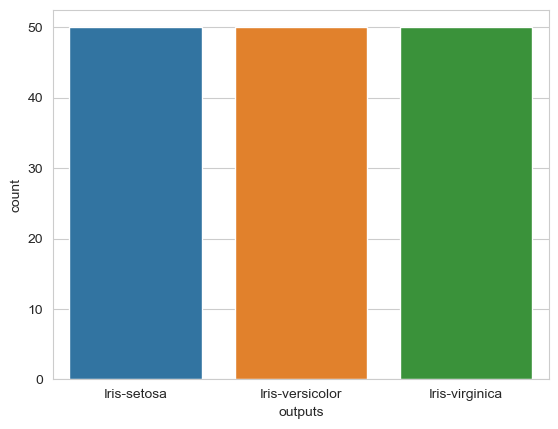

In [32]:
sns.countplot(iris_data['outputs'])

<AxesSubplot:xlabel='sepal length in cm', ylabel='sepal width in cm'>

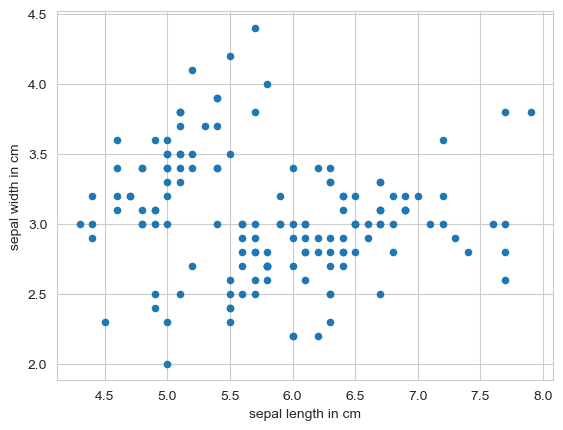

In [33]:
iris_data.plot(kind = 'scatter', x = 'sepal length in cm', y = 'sepal width in cm')

C:\Users\Inacio Raimundo\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


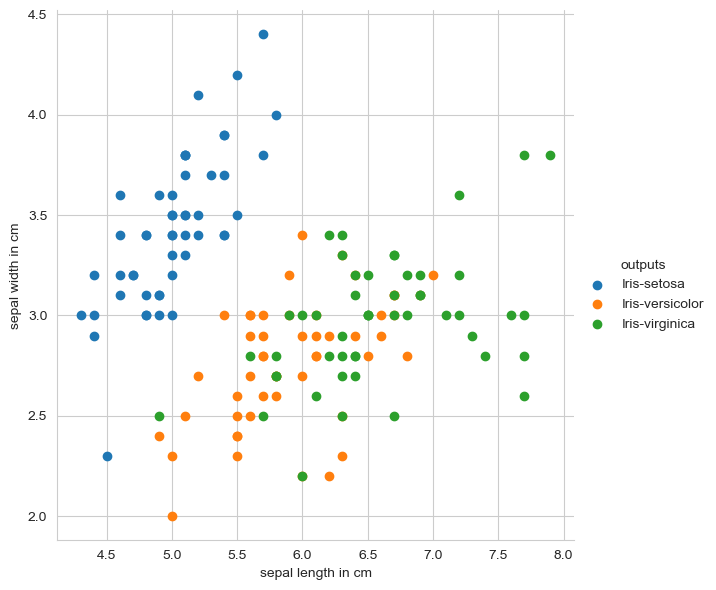

In [36]:
#2--D Plot with colour-coding for each flower type
sns.set_style('whitegrid')
sns.FacetGrid(iris_data, hue='outputs', size=6).map(plt.scatter, 'sepal length in cm', 'sepal width in cm').add_legend()

C:\Users\Inacio Raimundo\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


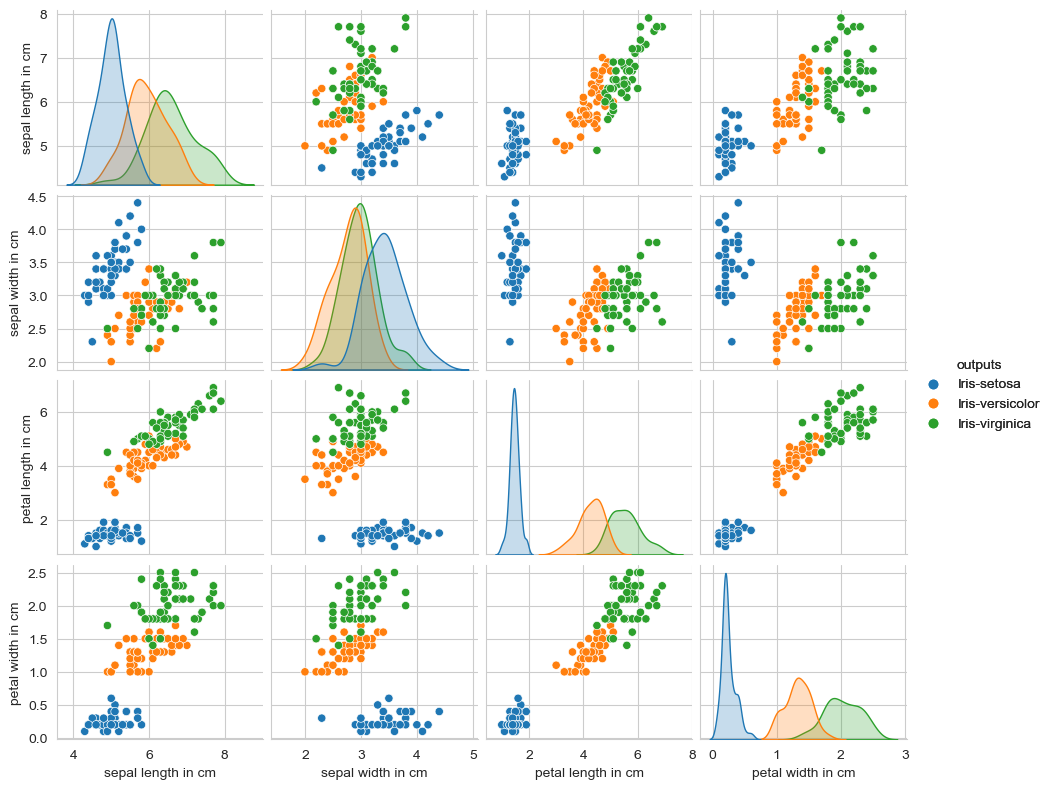

In [35]:
#Pairwise scattter plot: Pair-Plot
sns.pairplot(iris_data, hue='outputs', size=2).add_legend()

1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virginica and Versicolor have some overlap (almost linearly seperable).

In [14]:
#One Hot Enconding For Different Species // Convert categorical label to numerical

for column in iris_data.columns:
    if iris_data[column].dtype == np.number:
        continue
iris_data[column] = LabelEncoder().fit_transform(iris_data[column])        
    

C:\Users\Inacio Raimundo\AppData\Local\Temp\ipykernel_16708\1556574187.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if iris_data[column].dtype == np.number:


In [15]:
iris_data.dtypes

sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
outputs                 int32
dtype: object

In [16]:
iris_data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,outputs
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
#seperating Features

X = iris_data.drop(['outputs'],axis = 1)
y = iris_data['outputs']

In [18]:
X

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: outputs, Length: 150, dtype: int32

In [20]:
#Splitting Dataset into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [21]:
#Selecting different Ks in range [1,12] and choose the one with high accuracy

k_range = list(range(1,12))
acc = []
for i in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))

C:\Users\Inacio Raimundo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Inacio Raimundo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

In [22]:
acc

[0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

We can see that with K = 1,2,3,4,9,10,11 we are getting 100 % accuracy, so we are going to select K=1

In [23]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = knn.predict(X_test)

C:\Users\Inacio Raimundo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
metrics.accuracy_score(y_test, y_pred)

0.9333333333333333